# Imports

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, Modele linéaire

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

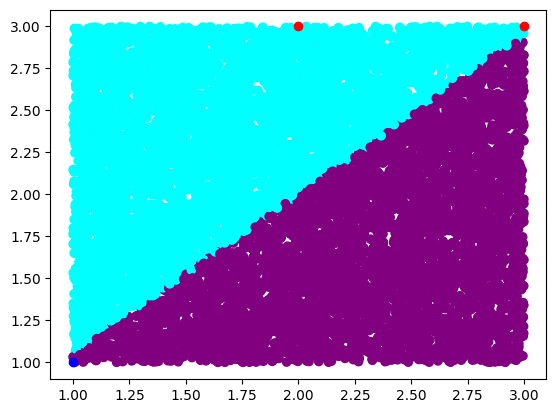

<Figure size 640x480 with 0 Axes>

In [37]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None
my_lib.generate_linear_model.argtypes = [ctypes.c_int32, ctypes.c_int32]
my_lib.generate_linear_model.restype = ctypes.POINTER(ctypes.c_float)



dimension = 2

w_array_ptr = my_lib.generate_linear_model(dimension,1)
w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)

Y = np.array([
      1,
      -1,
      -1
], dtype=ctypes.c_float)

X_plot = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])

Y_plot = np.array([
      1,
      -1,
      -1
])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 10000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_linear_model_classification.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.train_linear_model_classification.restype = ctypes.POINTER(ctypes.c_float)

train_linear_model_classification_ptr = my_lib.train_linear_model_classification(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # number of inputs
    dimension,  # dimension of inputs
    y_to_predict_ptr,  # pointeur to labels
    1, # nombre of classes to predict
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    train_linear_model_classification_ptr, ((dimension + 1),)
)

my_lib.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(10000) :
    x_1 = random.random()*2 + 1
    x_2 = random.random()*2 + 1
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_linear = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_linear_ptr = ctypes.cast(x_to_predict_linear, LP_c_float)

linear_predict_ptr = my_lib.predict_with_linear_model(
    train_linear_model_classification_ptr, # pointer to trained model
    x_to_predict_linear_ptr, # pointer to inputs
    len(X_to_predict), # nombre d'inputs
    len(X_to_predict[0]), # dimension des inputs
    1, # number of classes
    True, # is classification
)

linear_predict_output = np.ctypeslib.as_array(linear_predict_ptr,(1*len(X_to_predict),))

predicted_labels = []
predicted_x1 = []
predicted_x2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x1.append(X_to_predict_flat[i])
    else :
        predicted_x2.append(X_to_predict_flat[i])


for y in linear_predict_output :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')


plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [38]:
my_lib.delete_float_array(train_linear_model_classification_ptr, (dimension + 1))
del train_linear_model_classification_ptr
my_lib.delete_float_array(linear_predict_ptr, (1*len(X_to_predict)))
del linear_predict_ptr

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

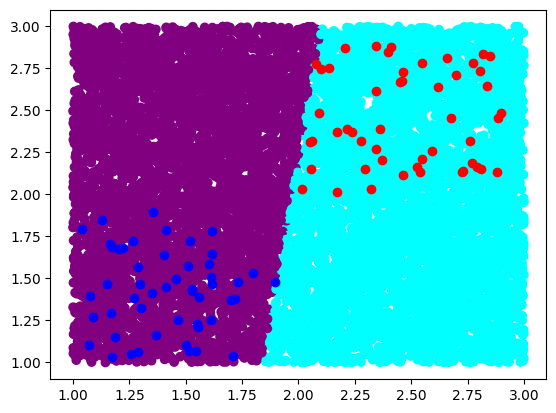

<Figure size 640x480 with 0 Axes>

In [39]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_linear_model.argtypes = [ctypes.c_int32,ctypes.c_int32]
my_lib.generate_linear_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_linear_model(dimension,1)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0], dtype=ctypes.c_float)

X_plot = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y_plot = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 100000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_linear_model_classification.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.train_linear_model_classification.restype = ctypes.POINTER(ctypes.c_float)

train_linear_model_classification_ptr = my_lib.train_linear_model_classification(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # number of inputs
    dimension,  # dimension of inputs
    y_to_predict_ptr,  # pointeur to labels
    1, # nombre of classes to predict
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    train_linear_model_classification_ptr, ((dimension + 1),)
)

my_lib.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(1.0, 3.0)
    x_2 = random.uniform(1.0, 3.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_linear = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_linear_ptr = ctypes.cast(x_to_predict_linear, LP_c_float)

linear_predict_ptr = my_lib.predict_with_linear_model(
    train_linear_model_classification_ptr, # pointer to trained model
    x_to_predict_linear_ptr, # pointer to inputs
    len(X_to_predict), # nombre d'inputs
    len(X_to_predict[0]), # dimension des inputs
    1, # number of classes
    True, # is classification
)

linear_predict_output = np.ctypeslib.as_array(linear_predict_ptr,(1*len(X_to_predict),))



predicted_labels = []
predicted_x1 = []
predicted_x2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x1.append(X_to_predict_flat[i])
    else :
        predicted_x2.append(X_to_predict_flat[i])


for y in linear_predict_output :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')


plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [40]:
my_lib.delete_float_array(train_linear_model_classification_ptr, (dimension + 1))
del train_linear_model_classification_ptr
my_lib.delete_float_array(linear_predict_ptr, (1*len(X_to_predict)))
del linear_predict_ptr

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

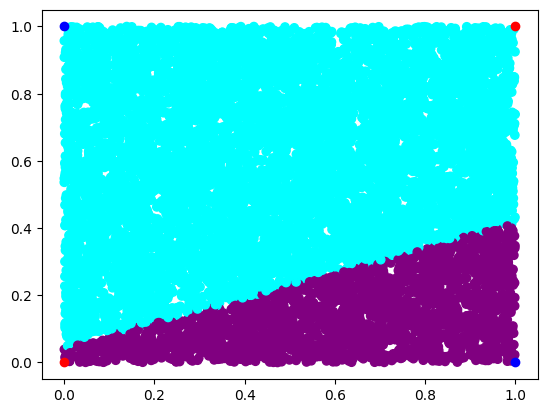

<Figure size 640x480 with 0 Axes>

In [49]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_linear_model.argtypes = [ctypes.c_int32,ctypes.c_int32]
my_lib.generate_linear_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_linear_model(dimension,1)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype= ctypes.c_float)
Y = np.array([1, 1, -1, -1], dtype= ctypes.c_float)

X_plot = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y_plot = np.array([1, 1, -1, -1])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 10000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_linear_model_classification.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.train_linear_model_classification.restype = ctypes.POINTER(ctypes.c_float)

train_linear_model_classification_ptr = my_lib.train_linear_model_classification(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # number of inputs
    dimension,  # dimension of inputs
    y_to_predict_ptr,  # pointeur to labels
    1, # nombre of classes to predict
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    train_linear_model_classification_ptr, ((dimension + 1),)
)

my_lib.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)


X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(0.0, 1.0)
    x_2 = random.uniform(0.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_linear = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_linear_ptr = ctypes.cast(x_to_predict_linear, LP_c_float)

linear_predict_ptr = my_lib.predict_with_linear_model(
    train_linear_model_classification_ptr, # pointer to trained model
    x_to_predict_linear_ptr, # pointer to inputs
    len(X_to_predict), # nombre d'inputs
    len(X_to_predict[0]), # dimension des inputs
    1, # number of classes
    True, # is classification
)

linear_predict_output = np.ctypeslib.as_array(linear_predict_ptr,(1*len(X_to_predict),))


predicted_labels = []
predicted_x1 = []
predicted_x2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x1.append(X_to_predict_flat[i])
    else :
        predicted_x2.append(X_to_predict_flat[i])


for y in linear_predict_output :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')


plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [50]:
my_lib.delete_float_array(train_linear_model_classification_ptr, (dimension + 1))
del train_linear_model_classification_ptr
my_lib.delete_float_array(linear_predict_ptr, (1*len(X_to_predict)))
del linear_predict_ptr

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

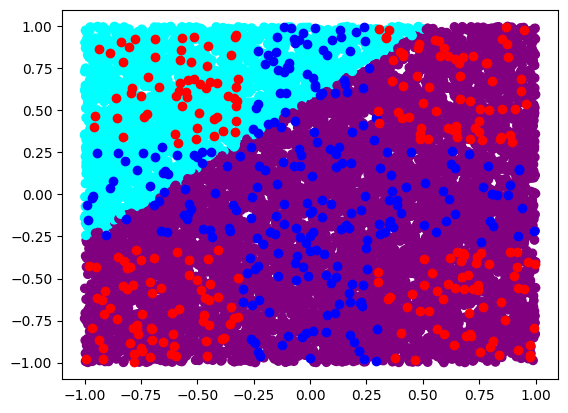

<Figure size 640x480 with 0 Axes>

In [51]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_linear_model.argtypes = [ctypes.c_int32,ctypes.c_int32]
my_lib.generate_linear_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_linear_model(dimension,1)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.random.random((500, 2)) * 2.0 - 1.0
X = np.array(X, dtype= ctypes.c_float)
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
Y = np.array(Y, dtype= ctypes.c_float)

X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.001)
epoch = 100000
X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_linear_model_classification.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.train_linear_model_classification.restype = ctypes.POINTER(ctypes.c_float)

train_linear_model_classification_ptr = my_lib.train_linear_model_classification(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # number of inputs
    dimension,  # dimension of inputs
    y_to_predict_ptr,  # pointeur to labels
    1, # nombre of classes to predict
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    train_linear_model_classification_ptr, ((dimension + 1),)
)


my_lib.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)



X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(-1.0, 1.0)
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_linear = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_linear_ptr = ctypes.cast(x_to_predict_linear, LP_c_float)

linear_predict_ptr = my_lib.predict_with_linear_model(
    train_linear_model_classification_ptr, # pointer to trained model
    x_to_predict_linear_ptr, # pointer to inputs
    len(X_to_predict), # nombre d'inputs
    len(X_to_predict[0]), # dimension des inputs
    1, # number of classes
    True, # is classification
)

linear_predict_output = np.ctypeslib.as_array(linear_predict_ptr,(1*len(X_to_predict),))


predicted_labels = []
predicted_x1 = []
predicted_x2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x1.append(X_to_predict_flat[i])
    else :
        predicted_x2.append(X_to_predict_flat[i])


for y in linear_predict_output :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

In [52]:
my_lib.delete_float_array(train_linear_model_classification_ptr, (dimension + 1))
del train_linear_model_classification_ptr
my_lib.delete_float_array(linear_predict_ptr, (1*len(X_to_predict)))
del linear_predict_ptr

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

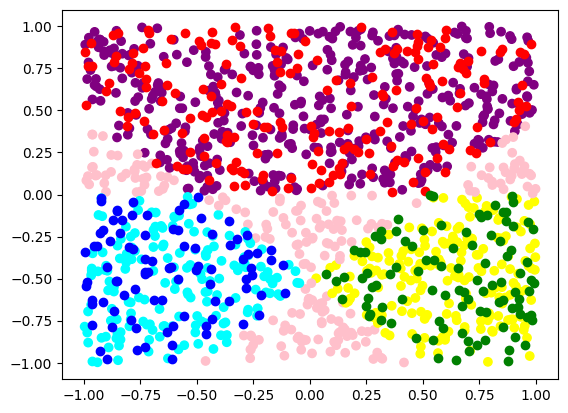

<Figure size 640x480 with 0 Axes>

In [58]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_linear_model.argtypes = [ctypes.c_int32,ctypes.c_int32]
my_lib.generate_linear_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_linear_model(dimension,3)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1, -1, -1]for p in X])

X = X[[not np.all(arr == [-1, -1, -1]) for arr in Y]]
Y = Y[[not np.all(arr == [-1, -1, -1]) for arr in Y]]



X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)


X_plot = np.random.random((500, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1, -1, -1]for p in X_plot])

X_plot = X_plot[[not np.all(arr == [-1, -1, -1]) for arr in Y_plot]]
Y_plot = Y_plot[[not np.all(arr == [-1, -1, -1]) for arr in Y_plot]]

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.01)
epoch = 10000
X_flat = X.flatten()
Y_flat = Y.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)


my_lib.train_linear_model_classification.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.train_linear_model_classification.restype = ctypes.POINTER(ctypes.c_float)

train_linear_model_classification_ptr = my_lib.train_linear_model_classification(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # number of inputs
    dimension,  # dimension of inputs
    y_to_predict_ptr,  # pointeur to labels
    3, # nombre of classes to predict
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    train_linear_model_classification_ptr, ((dimension + 1),)
)


my_lib.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)



X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(-1.0, 1.0)
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_linear = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_linear_ptr = ctypes.cast(x_to_predict_linear, LP_c_float)

linear_predict_ptr = my_lib.predict_with_linear_model(
    train_linear_model_classification_ptr, # pointer to trained model
    x_to_predict_linear_ptr, # pointer to inputs
    len(X_to_predict), # nombre d'inputs
    len(X_to_predict[0]), # dimension des inputs
    3, # number of classes
    True, # is classification
)

linear_predict_output = np.ctypeslib.as_array(linear_predict_ptr,(3*len(X_to_predict),))


predicted_labels = []
predicted_x1 = []
predicted_x2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x1.append(X_to_predict_flat[i])
    else :
        predicted_x2.append(X_to_predict_flat[i])


for j in range(0,len(linear_predict_output)-2,3) :
    if linear_predict_output[j] > linear_predict_output[j+1] and linear_predict_output[j] > linear_predict_output[j+2] :
        predicted_labels.append('cyan')
    elif linear_predict_output[j+1] > linear_predict_output[j] and linear_predict_output[j+1] > linear_predict_output[j+2]:
        predicted_labels.append('purple')
    elif linear_predict_output[j+2] > linear_predict_output[j] and linear_predict_output[j+2] > linear_predict_output[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('pink')

plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [59]:
my_lib.delete_float_array(train_linear_model_classification_ptr, (dimension + 1))
del train_linear_model_classification_ptr
my_lib.delete_float_array(linear_predict_ptr, (3*len(X_to_predict)))
del linear_predict_ptr

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

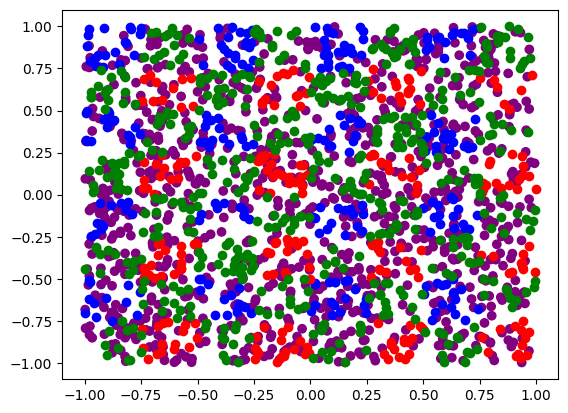

<Figure size 640x480 with 0 Axes>

In [62]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_linear_model.argtypes = [ctypes.c_int32,ctypes.c_int32]
my_lib.generate_linear_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

dimension = 2

w_array_ptr = my_lib.generate_linear_model(dimension,3)

w_array = np.ctypeslib.as_array(w_array_ptr, ((dimension + 1),))

X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

X_plot = np.random.random((1000, 2)) * 2.0 - 1.0
Y_plot = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

arr_size = len(X)
dimension = len(X[0])
learning_rate = ctypes.c_float(0.01)
epoch = 100000
X_flat = X.flatten()
Y_flat = Y.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_1_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)


my_lib.train_linear_model_classification.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
]
my_lib.train_linear_model_classification.restype = ctypes.POINTER(ctypes.c_float)

train_linear_model_classification_ptr = my_lib.train_linear_model_classification(
    w_array_ptr,  # pointeur vers le résultat du vecteur W random
    x_to_predict_ptr,  # points qui ont permis de labeliser le vecteur d'au dessus
    arr_size,  # number of inputs
    dimension,  # dimension of inputs
    y_to_predict_ptr,  # pointeur to labels
    3, # nombre of classes to predict
    learning_rate,  # learning rate
    epoch,  # nombre de fois où l'on passe sur le data set
)
trained_linear_model = np.ctypeslib.as_array(
    train_linear_model_classification_ptr, ((dimension + 1),)
)



my_lib.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)



X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(-1.0, 1.0)
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_linear = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_linear_ptr = ctypes.cast(x_to_predict_linear, LP_c_float)

linear_predict_ptr = my_lib.predict_with_linear_model(
    train_linear_model_classification_ptr, # pointer to trained model
    x_to_predict_linear_ptr, # pointer to inputs
    len(X_to_predict), # nombre d'inputs
    len(X_to_predict[0]), # dimension des inputs
    3, # number of classes
    True, # is classification
)

linear_predict_output = np.ctypeslib.as_array(linear_predict_ptr,(3*len(X_to_predict),))


predicted_labels = []
predicted_x1 = []
predicted_x2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x1.append(X_to_predict_flat[i])
    else :
        predicted_x2.append(X_to_predict_flat[i])


for j in range(0,len(linear_predict_output)-2,3) :
    if linear_predict_output[j] > linear_predict_output[j+1] and linear_predict_output[j] > linear_predict_output[j+2] :
        predicted_labels.append('cyan')
    elif linear_predict_output[j+1] > linear_predict_output[j] and linear_predict_output[j+1] > linear_predict_output[j+2]:
        predicted_labels.append('purple')
    elif linear_predict_output[j+2] > linear_predict_output[j] and linear_predict_output[j+2] > linear_predict_output[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('pink')


plt.scatter(predicted_x1, predicted_x2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [63]:
my_lib.delete_float_array(train_linear_model_classification_ptr, (dimension + 1))
del train_linear_model_classification_ptr
my_lib.delete_float_array(linear_predict_ptr, (3*len(X_to_predict)))
del linear_predict_ptr